In [1]:
pip install astroML

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 KB 2.1 MB/s eta 0:00:00


# Assignment 8
Devananth V - EP20Btech11004

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astroML.correlation import bootstrap_two_point_angular

Q1

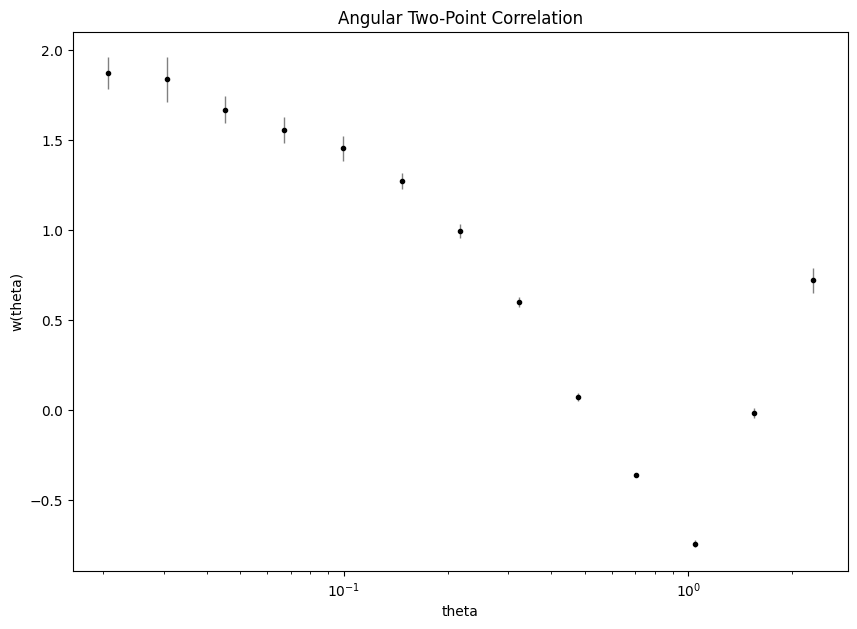

In [6]:
data = np.loadtxt('https://www.iith.ac.in/~shantanud/BCS05hr_reduced.txt')

data = data[data[:,2] < 20]
data = data[data[:,2] > 17]
data = data[data[:,3] > 0.002]

def two_point_correlation(N):
 LINS = np.linspace(np.log10(1.0/60.0), np.log10(6), 16)
 bins = 10 ** LINS
 res = [bins]
 for d in [data]:
  res += bootstrap_two_point_angular(d[:,0], d[:,1], bins=bins, method='landy-szalay', Nbootstraps=N)
 return res

bins, b_corr, b_corr_err, b_bootstraps = two_point_correlation(10)
bin_cen = 0.5 * (bins[1:] + bins[:-1])

plt.figure(figsize=(10,7))
plt.xscale('log')
plt.yscale('linear')
plt.errorbar(bin_cen, b_corr, b_corr_err, fmt='.k', ecolor='gray', lw=1)
plt.xlabel('theta')
plt.ylabel('w(theta)')
plt.title('Angular Two-Point Correlation')
plt.show()